# Estate Price Prediction models

In [ ]:
import os
import pandas as pd

data_test = pd.read_csv("../data/test_data_2nd.csv")
X = data_test.iloc[:, 1:-1]
y = data_test.iloc[:, -1]

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor
import pickle

lr = pickle.load(open("../models/LinearRegression.h5"), 'rb')
ridge = pickle.load(open("../models/Ridge.h5"), 'rb')
lasso = pickle.load(open("../models/Lasso.h5"), 'rb')

linear_svm = pickle.load(open("../models/LinearSVM.h5"), 'rb')
svm = pickle.load(open("../models/SVM.h5"), 'rb')

gb = pickle.load(open("../models/GradientBoosting.h5"), 'rb')
rf = pickle.load(open("../models/RandomForest.h5"), 'rb')

xgb = XGBRegressor(
    booster='gbtree',
    tree_method='hist',
    eval_metric=mean_absolute_percentage_error,
    n_estimators=500,
    learning_rate=0.05,
    max_depth=12
)
xgb.load_model("../models/XGBoostRegressor.json")
xgb.set_params(device='cpu')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DummyRegressor from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator GradientBoostingRegressor from version 1.5.1 when using version 1.5.2. This might lead to

XGBRegressor(base_score='1.0449001E1', booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False,
             eval_metric=<function mean_absolute_percentage_error at 0x7e1283f21d80>,
             feature_types=['float', 'float', 'float', 'float', 'float',
                            'float', 'float', 'float',...
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [5]:
y_lr = lr.predict(X)
y_ridge = ridge.predict(X)
y_lasso = lasso.predict(X)

y_linear_svm = linear_svm.predict(X)
y_svm = svm.predict(X)

y_gb = gb.predict(X)
y_rf = rf.predict(X)

y_xgb = xgb.predict(X)

In [6]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error, median_absolute_error

def median_absolute_percentage_error(y_true, y_pred):
  result = abs(y_true - y_pred) / y_true
  return result.median()

metrics_dict = {'mae':mean_absolute_error, 'mape':mean_absolute_percentage_error, 'rmse':root_mean_squared_error,
                'medae':median_absolute_error, 'medape':median_absolute_percentage_error}
model_names = ["Linear Regression", "Ridge", "Lasso", "SVM", "Linear SVM", "Gradient Boosting", "Random Forest", "XGBoost"]

losses = {model:{'mae':0,'mape':0,'rmse':0,'medae':0,'medape':0} for model in model_names}
for loss in ['mae', 'mape', 'rmse', 'medae', 'medape']:
    losses["Linear Regression"][loss] = metrics_dict[loss](y, y_lr)
    losses["Ridge"][loss] = metrics_dict[loss](y, y_ridge)
    losses["Lasso"][loss] = metrics_dict[loss](y, y_lasso)
    losses["Linear SVM"][loss] = metrics_dict[loss](y, y_linear_svm)
    losses["SVM"][loss] = metrics_dict[loss](y, y_svm)
    losses["Gradient Boosting"][loss] = metrics_dict[loss](y, y_gb)
    losses["Random Forest"][loss] = metrics_dict[loss](y, y_rf)
    losses["XGBoost"][loss] = metrics_dict[loss](y, y_xgb)

# print(*[item for item in losses.items()], sep='\n')
# print in readable format
for model, loss in losses.items():
    print(f"Metrics' results of {model} model")
    for metric, value in loss.items():
        print("%s: %.5f" % (metric, value), end='\t')
    print("\n")

Metrics' results of Linear Regression model
mae: 8.35993	mape: 3.11105	rmse: 34.38298	medae: 4.65990	medape: 0.74088	

Metrics' results of Ridge model
mae: 8.35959	mape: 3.11109	rmse: 34.39549	medae: 4.65827	medape: 0.74086	

Metrics' results of Lasso model
mae: 8.03614	mape: 2.99222	rmse: 22.33955	medae: 4.65747	medape: 0.74436	

Metrics' results of SVM model
mae: 7.36885	mape: 1.64017	rmse: 23.55125	medae: 2.60724	medape: 0.54841	

Metrics' results of Linear SVM model
mae: 7.17829	mape: 1.67199	rmse: 45.67575	medae: 2.11974	medape: 0.45269	

Metrics' results of Gradient Boosting model
mae: 5.81646	mape: 1.71464	rmse: 21.92018	medae: 1.60898	medape: 0.32458	

Metrics' results of Random Forest model
mae: 5.19898	mape: 2.65717	rmse: 18.28129	medae: 1.90203	medape: 0.32508	

Metrics' results of XGBoost model
mae: 4.94095	mape: 2.05432	rmse: 19.92407	medae: 1.24196	medape: 0.22735	



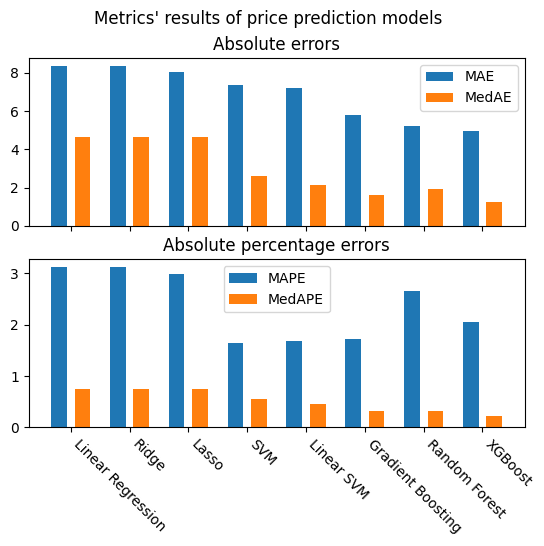

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)

ax1.bar((np.arange(len(model_names)) - 0.2)*1.5, [losses[model]['mae'] for model in model_names], width=0.4, label="MAE")
ax1.bar((np.arange(len(model_names)) + 0.2)*1.5, [losses[model]['medae'] for model in model_names], width=0.4, label="MedAE")

ax2.bar((np.arange(len(model_names)) - 0.2)*1.5, [losses[model]['mape'] for model in model_names], width=0.4, label="MAPE")
ax2.bar((np.arange(len(model_names)) + 0.2)*1.5, [losses[model]['medape'] for model in model_names], width=0.4, label="MedAPE")

# ax1.set_xticks(np.arange(len(model_names))*1.5, model_names, rotation=-45, ha='left')
ax2.set_xticks(np.arange(len(model_names))*1.5, model_names, rotation=-45, ha='left')

ax1.set_title("Absolute errors")
ax2.set_title("Absolute percentage errors")
fig.suptitle("Metrics' results of price prediction models")
ax1.legend()
ax2.legend()
plt.show()

**26/11:**
- Lasso looks better than during training
- SVM (with RBF kernel) > Linear SVM
- SVM has better MAE & MAPE, but Lasso has slightly better RMSE; should not be a problem

**1/12**
- Added Random Forest, Gradient Boosting and XGBoost's GB
- XGBoost Gradient Boosting: 2.05 MAPE, 4.94 MAE -> best -> should use for demo if needed

In [ ]:
data_train = pd.read_csv("../data/train_data_2nd.csv")
X = pd.concat([X, data_train.iloc[:, 1:-1]])
y = pd.concat([y, data_train.iloc[:, -1]])
xgb.fit(X, y)

XGBRegressor(base_score='1.0449001E1', booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False,
             eval_metric=<function mean_absolute_percentage_error at 0x7c02e93996c0>,
             feature_types=['float', 'float', 'float', 'float', 'float',
                            'float', 'float', 'float',...
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
svm.fit(X, y)
rf.fit(X, y)

RandomForestRegressor(max_depth=12, max_features='log2', max_samples=0.65,
                      n_estimators=250)

In [ ]:
xgb.save_model("../models/XGBoostRegressor_final.json")

In [ ]:
pickle.dump(rf, open("../models/RandomForest_final.h5"), 'wb')
pickle.dump(svm, open("../models/SVM_final.h5"), 'wb')

# Property Type Classification models

In [13]:
# data for property type classification
y = data_test['Property Type']
X = data_test.loc[:, data_test.columns != 'Property Type'].iloc[:, 1:]

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

l_svm = pickle.load(open("../models/LinearSVM_Classifier.h5"), 'rb')
gb = pickle.load(open("../models/GradientBoosting_Classifier.h5"), 'rb')
rf = pickle.load(open("../models/RandomForest_Classifier.h5"), 'rb')

xgb = XGBClassifier(
    booster='gbtree',
    tree_method='hist',
    eval_metric=accuracy_score,
    device='cuda',
    n_estimators=300,
    learning_rate=0.1,
    max_depth=7
)
xgb.load_model("../models/XGBoostClassifier.json")
xgb.set_params(device='cpu')

XGBClassifier(base_score='5E-1', booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False,
              eval_metric=<function accuracy_score at 0x7e1283eccee0>,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [15]:
y_l_svm = l_svm.predict(X)
y_gb = gb.predict(X)
y_rf = rf.predict(X)
y_xgb = xgb.predict(X)

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

model_names = ["Linear SVM", "Random Forest", "Gradient Boosting", "XGBoost"]
losses = {model:{'accuracy':0,'precision':0,'recall':0,'f1':0} for model in model_names}

losses["Linear SVM"]['accuracy'] = accuracy_score(y, y_l_svm)
losses["Linear SVM"]['precision'] = precision_score(y, y_l_svm, average='macro', zero_division=0)
losses["Linear SVM"]['recall'] = recall_score(y, y_l_svm, average='macro', zero_division=0)
losses["Linear SVM"]['f1'] = f1_score(y, y_l_svm, average='macro', zero_division=0)

losses["Random Forest"]['accuracy'] = accuracy_score(y, y_rf)
losses["Random Forest"]['precision'] = precision_score(y, y_rf, average='macro', zero_division=0)
losses["Random Forest"]['recall'] = recall_score(y, y_rf, average='macro', zero_division=0)
losses["Random Forest"]['f1'] = f1_score(y, y_rf, average='macro', zero_division=0)

losses["Gradient Boosting"]['accuracy'] = accuracy_score(y, y_gb)
losses["Gradient Boosting"]['precision'] = precision_score(y, y_gb, average='macro', zero_division=0)
losses["Gradient Boosting"]['recall'] = recall_score(y, y_gb, average='macro', zero_division=0)
losses["Gradient Boosting"]['f1'] = f1_score(y, y_gb, average='macro', zero_division=0)

losses["XGBoost"]['accuracy'] = accuracy_score(y, y_xgb)
losses["XGBoost"]['precision'] = precision_score(y, y_xgb, average='macro', zero_division=0)
losses["XGBoost"]['recall'] = recall_score(y, y_xgb, average='macro', zero_division=0)
losses["XGBoost"]['f1'] = f1_score(y, y_xgb, average='macro', zero_division=0)

for model, loss in losses.items():
    print(f"Metrics' results of {model} model")
    for metric, value in loss.items():
        print("%s: %.5f" % (metric, value), end='\t')
    print("\n")

Metrics' results of Linear SVM model
accuracy: 0.57863	precision: 0.48336	recall: 0.42627	f1: 0.42154	

Metrics' results of Random Forest model
accuracy: 0.81700	precision: 0.79365	recall: 0.78769	f1: 0.79038	

Metrics' results of Gradient Boosting model
accuracy: 0.81991	precision: 0.75259	recall: 0.73695	f1: 0.74413	

Metrics' results of XGBoost model
accuracy: 0.83638	precision: 0.77964	recall: 0.77866	f1: 0.77897	



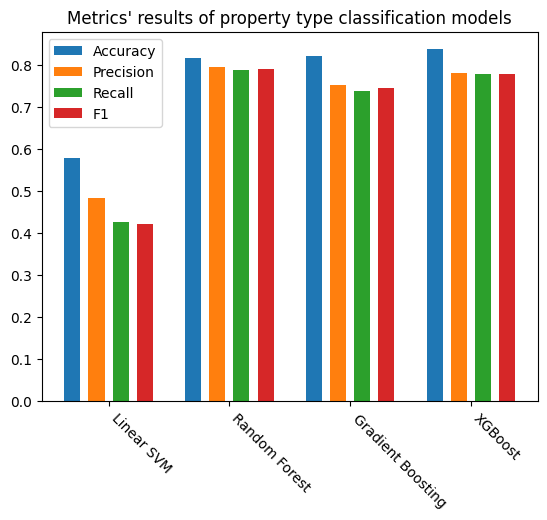

In [17]:
fig, ax = plt.subplots()

ax.bar((np.arange(len(model_names)) - 0.3)*1.5, [losses[model]['accuracy'] for model in model_names], width=0.2, label="Accuracy")
ax.bar((np.arange(len(model_names)) - 0.1)*1.5, [losses[model]['precision'] for model in model_names], width=0.2, label="Precision")
ax.bar((np.arange(len(model_names)) + 0.1)*1.5, [losses[model]['recall'] for model in model_names], width=0.2, label="Recall")
ax.bar((np.arange(len(model_names)) + 0.3)*1.5, [losses[model]['f1'] for model in model_names], width=0.2, label="F1")

ax.set_xticks(np.arange(len(model_names))*1.5, model_names, rotation=-45, ha='left')

ax.set_title("Metrics' results of property type classification models")
ax.legend()
plt.show()

- Linear SVM worst
- Remaining all good
- XGBoost model works best; consistent precision and recall
- Random Forest has most consistent results

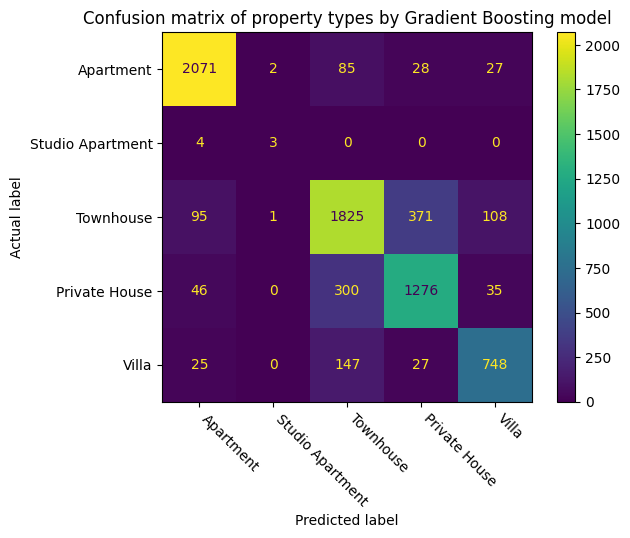

In [25]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay(confusion_matrix(y, y_gb), display_labels=["Apartment","Studio Apartment","Townhouse","Private House","Villa"])
cm.plot()
plt.title('Confusion matrix of property types by Gradient Boosting model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(rotation=-45, ha='left')
plt.show()

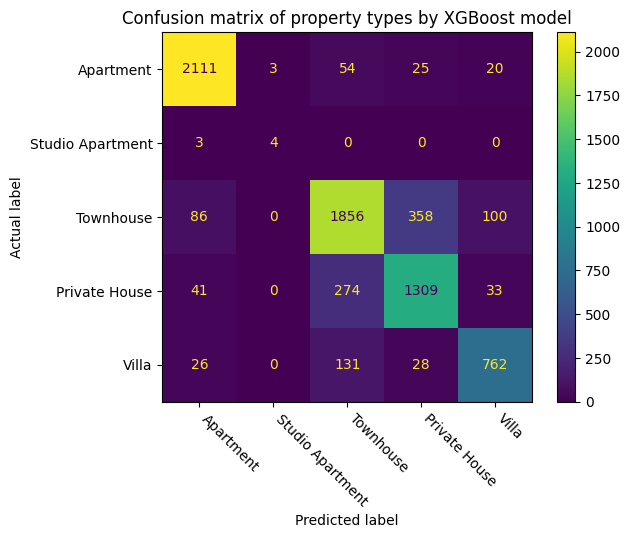

In [ ]:
# Confusion matrix

cm = ConfusionMatrixDisplay(confusion_matrix(y, y_xgb), display_labels=["Apartment","Studio Apartment","Townhouse","Private House","Villa"])
cm.plot()
plt.title('Confusion matrix of property types by XGBoost model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(rotation=-45, ha='left')
plt.show()

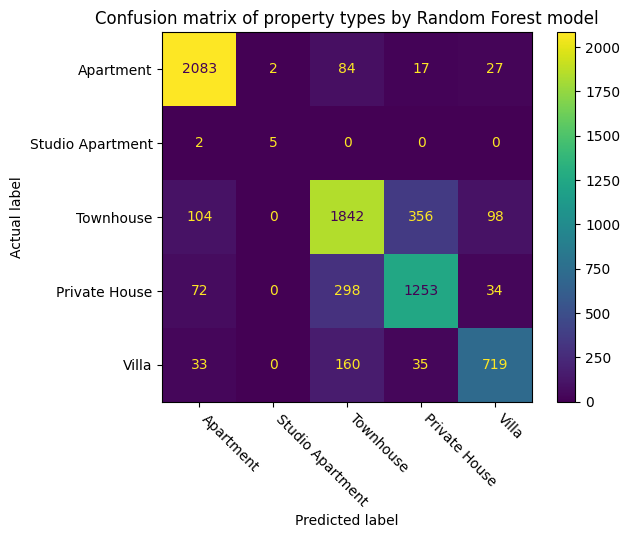

In [ ]:
# Confusion matrix

cm = ConfusionMatrixDisplay(confusion_matrix(y, y_rf), display_labels=["Apartment","Studio Apartment","Townhouse","Private House","Villa"])
cm.plot()
plt.title('Confusion matrix of property types by Random Forest model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(rotation=-45, ha='left')
plt.show()

- Common pattern: townhouse (houses aimed for commercial uses (?)) and private houses are confused by large numbers -> similar properties?
- Townhouses and villas are also confused by models, although not as much
- Same with townhouses and apartments

**Townhouses seem to be the hardest to classify**